In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

## Cleaning Data
The cell below is used to remove movies which for one reason or another do not lend themselves to analysis. For instance we've decided to discard movies which were in theaters for fewer than 4 weeks.

In [ ]:
boxOffice = pickle.load( open( "BoxOfficeMojoWeekly.p", "rb" ) )
rawBoxOffice = pickle.load( open( "BoxOfficeMojoWeekly.p", "rb" ) )
titles = list(boxOffice.keys())
stringVal = False
badOrder = 0
for title in titles:
    movieData = boxOffice[title]
    # Remove entries with no weekly gross data, number of theaters, or with fewer than three reported weeks
    if ('Weekly' not in movieData.columns) or ('-' in movieData.Theaters.values) or (int(max(movieData.Week))<=3):
        del boxOffice[title]
    # A few movies have special opening weekends which open very small. I've excluded them
    elif (type(movieData.Week.values[0])==str):
        print(title)
        del boxOffice[title]
    # Ensures box week numbers are not incorrectly numbered
    elif True in (np.diff(movieData.Week.values)<=0).tolist():
        # print(title)
        badOrder+=1
        del boxOffice[title]
    else:
    # Cleaning Dollar values in dataframe
        movieData.Weekly = movieData.Weekly.replace(r'\$|,', '', regex=True).astype(float)
        movieData.Avg = movieData.Avg.replace(r'\$|,', '', regex=True).astype(float)
        movieData['To Date'] = movieData['To Date'].replace(r'\$|,', '', regex=True).astype(float)

Fright Night
The Lost World: Jurassic Park
Snatch
Austin Powers in Goldmember
Rumor Has It...
Snakes on a Plane
Shrek the Third
Pirates of the Caribbean: At World's End
Star Trek
Inglourious Basterds
Clash of the Titans
Saw 3D
Super 8
Mission: Impossible - Ghost Protocol
Justin Bieber: Never Say Never
Skyfall
This Means War
Jumanji: Welcome to the Jungle
Aquaman


In [7]:
print("Total Movies Usable:", len(boxOffice))
print("Movies with inaccurate week numbers:", badOrder)

Total Movies Usable: 5232
Movies with inaccurate week numbers: 155


## Example Movie Performance Over Time
Here are some randomly selected movies and how they faired over time. I've included both raw grosses and per screen average. The latter provides an idea how much of a movie's performance is due to the number of theaters it's being shown in vs. actual interest by the public.

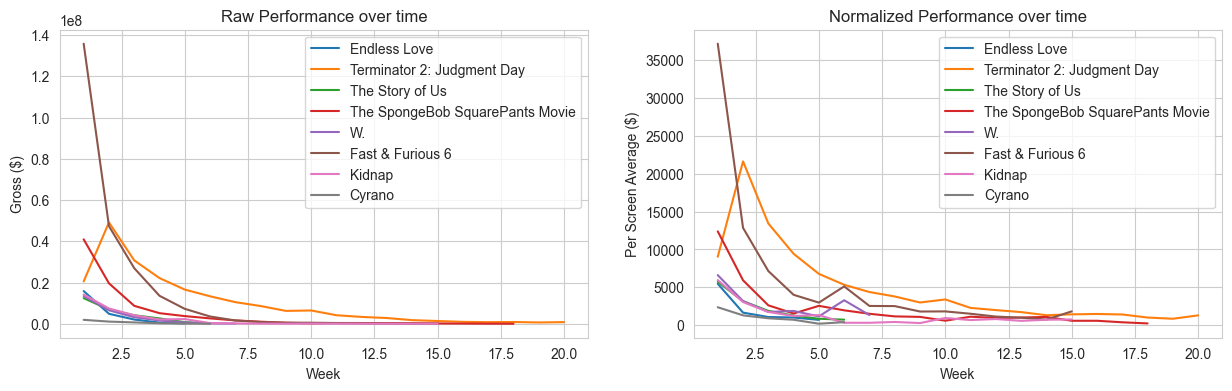

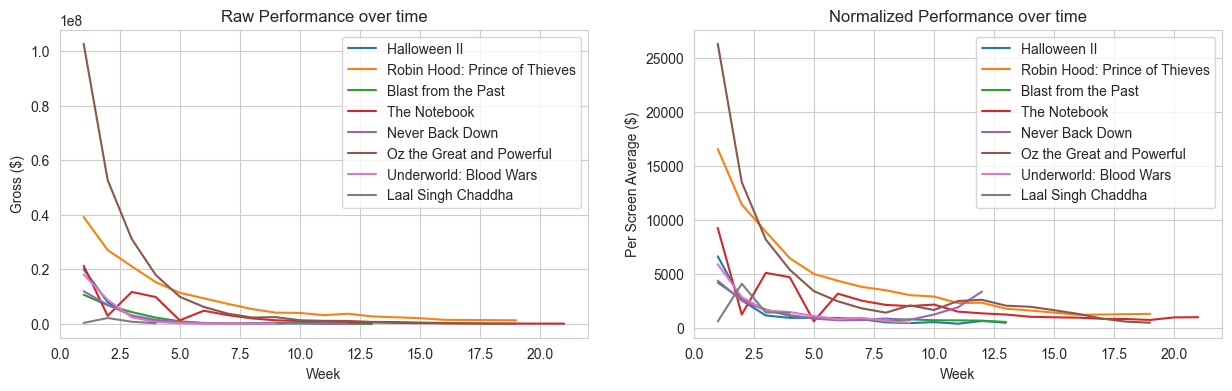

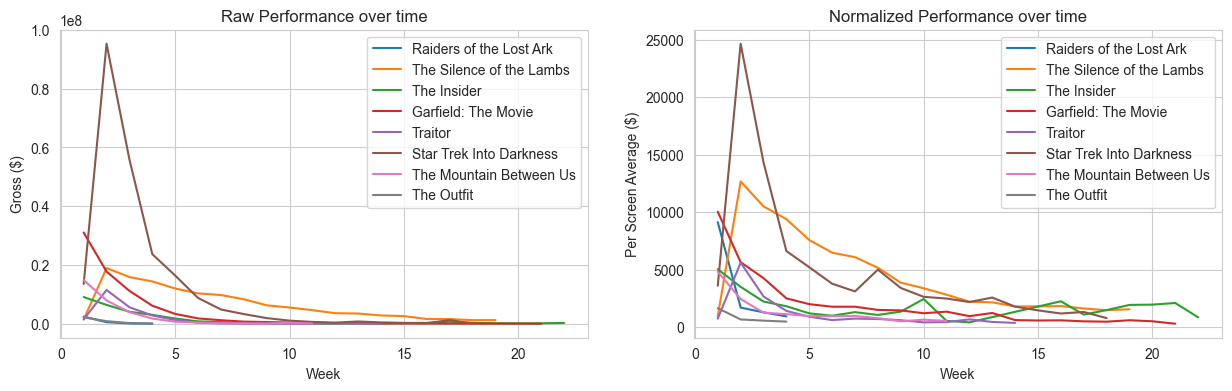

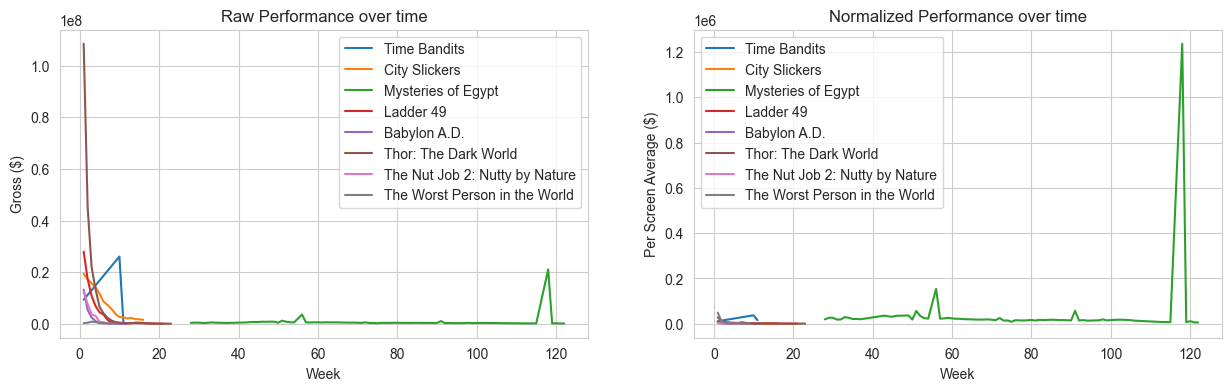

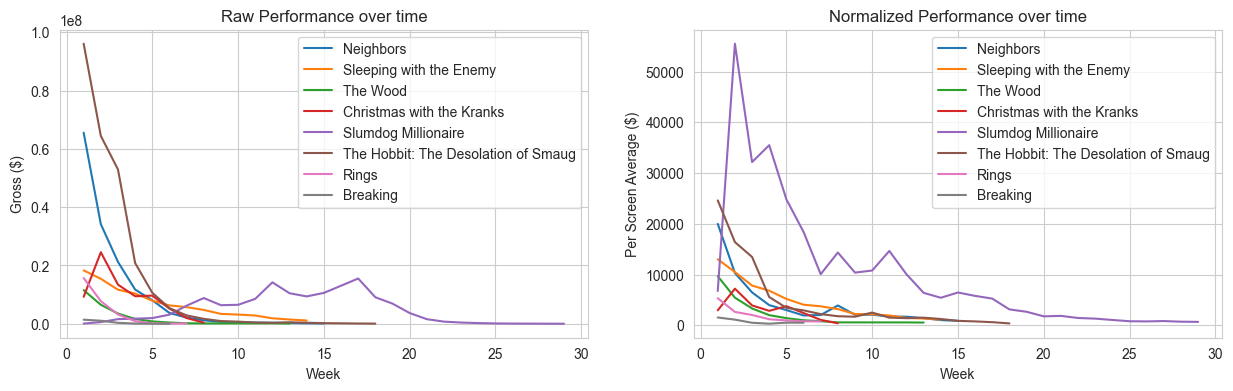

In [4]:
start = 10
for start in range(start, start+5, 1):
    figs, axs = plt.subplots(1, 2, figsize = (15,4))
    for title in list(boxOffice)[start::700]:
        axs[1].plot(boxOffice[title].Week, boxOffice[title].Avg, label=title)
        axs[0].plot(boxOffice[title].Week, boxOffice[title].Weekly, label=title)
    for i in range(2):  
        axs[i].set_xlabel('Week')
        axs[i].legend()
    axs[1].set_title('Normalized Performance over time')
    axs[0].set_title('Raw Performance over time')
    axs[1].set_ylabel('Per Screen Average ($)')
    axs[0].set_ylabel('Gross ($)')

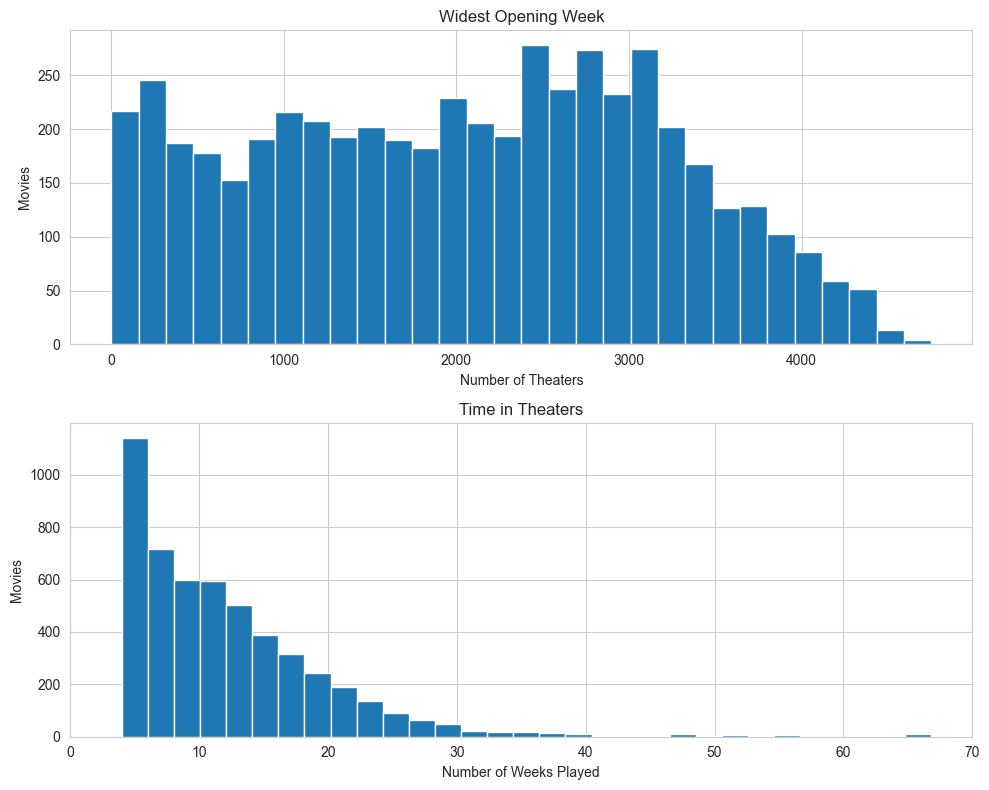

In [5]:
maxTheaters = []
numWeeks = []
for title in boxOffice.keys():
    maxTheaters.append(max(boxOffice[title].Theaters))
    numWeeks.append(int(max(boxOffice[title].Week)))

figs, axs = plt.subplots(2, figsize=(10, 8))
axs[0].hist(maxTheaters, bins=30)
axs[0].set_title('Widest Opening Week')
# plt.xlim([0, 50])
axs[0].set_xlabel('Number of Theaters')
axs[0].set_ylabel('Movies')

axs[1].hist(numWeeks, bins=200)

# Ticks placed at the center of the bins.
axs[1].set_title('Time in Theaters')
axs[1].set_xlim([0, 70])
# axs[1].set_xticks(np.arange(1, 300, 30))
# axs[1].set_xticklabels(np.arange(1, 300, 30))
axs[1].set_xlabel('Number of Weeks Played')
axs[1].set_ylabel('Movies')
figs.tight_layout()